In [34]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [17]:
#import csv file from OECD
data_file_path = os.path.join("Resources", "data_working.csv")
data_file_df = pd.read_csv(data_file_path)
data_file_df.head()

,Unnamed: 0,Country,Year,Union %,Gini,CPI
0,0,Hungary,2009,11.9,0.245,95.369304
1,1,Hungary,2015,9.0,0.291,111.384411
2,2,Poland,2009,16.3,0.305,97.484226
3,3,Poland,2010,18.3,0.307,100.000000
4,4,Poland,2011,17.0,0.304,104.239401


In [18]:
#Create lists of countries based on their 2020 ITUC ratings
list5 = ["Greece","Korea","Turkey"]
list4 = ["Mexico","United States","Chile"]
list3 = ["Australia","Hungary","Poland","United Kingdom"]
list2 = ["Belgium","Canada","Czech Republic","Spain","Estonia","France","Israel","Japan","Latvia","Lithuania","New Zealand","Portugal","Switzerland"]
list1 = ["Austria","Denmark","Finland","Germany","Iceland","Ireland","Italy","Netherlands","Norway","Slovak Republic","Sweden"]

In [19]:
#Create a list of the countries
#OECD countries not included: Luxembourg and Slovenia
countries=["Greece","Korea","Turkey","Mexico","United States","Chile","Australia","Canada",
                 "Hungary","Poland","Spain","United Kingdom",
                "Belgium","Czech Republic","Estonia","France","Israel","Japan","Latvia","Lithuania","New Zealand",
                 "Portugal","Switzerland","Austria","Denmark","Finland","Germany","Iceland","Ireland","Italy",
                 "Netherlands","Norway","Slovak Republic","Sweden"]

In [20]:
#Create a data frame from the lists
dict={"Country":["Greece","South Korea","Turkey","Mexico","United States of America","Chile","Australia","Canada",
                 "Hungary","Poland","Spain","United Kingdom",
                "Belgium","Czech Republic","Estonia","France","Israel","Japan","Latvia","Lithuania","New Zealand",
                 "Portugal","Switzerland","Austria","Denmark","Finland","Germany","Iceland","Ireland","Italy",
                 "Netherlands","Norway","Slovakia","Sweden"]}

df=pd.DataFrame(dict)
df.head()

,Country
0,Greece
1,South Korea
2,Turkey
3,Mexico
4,United States of America


In [21]:
#Create a list of each countries rating
my_list=[]
for country in countries:
    if country in list5:
        my_list.append(5)
    if country in list4:
        my_list.append(4)
    if country in list3:
        my_list.append(3)
    if country in list2:
        my_list.append(2)
    if country in list1:
        my_list.append(1)

In [22]:
#Create a dictionary of the countries and their ratings
new_dict=zip(countries,my_list)
new_dict

In [23]:
#turn the dictionary into a dataframe
df1=pd.DataFrame(new_dict)
df1.head()

,0,1
0,Greece,5
1,Korea,5
2,Turkey,5
3,Mexico,4
4,United States,4


In [24]:
#change column headers
df1=df1.rename(columns={0:"Country",1:"Score"})
df1.head()

,Country,Score
0,Greece,5
1,Korea,5
2,Turkey,5
3,Mexico,4
4,United States,4


In [25]:
#format the data_file_df
data_df=data_file_df.drop(["Unnamed: 0"],axis=1)
data_df.head()

,Country,Year,Union %,Gini,CPI
0,Hungary,2009,11.9,0.245,95.369304
1,Hungary,2015,9.0,0.291,111.384411
2,Poland,2009,16.3,0.305,97.484226
3,Poland,2010,18.3,0.307,100.000000
4,Poland,2011,17.0,0.304,104.239401


In [26]:
#merge the ITUC ratings to the data from the OECD
result_df=data_df.merge(df1,how="left",on="Country")
result_df.head()

,Country,Year,Union %,Gini,CPI,Score
0,Hungary,2009,11.9,0.245,95.369304,3.0
1,Hungary,2015,9.0,0.291,111.384411,3.0
2,Poland,2009,16.3,0.305,97.484226,3.0
3,Poland,2010,18.3,0.307,100.000000,3.0
4,Poland,2011,17.0,0.304,104.239401,3.0


In [27]:
result_df.to_csv(os.path.join("Resources","ITUC.csv"))

In [28]:
#group the countries by their rating and determine the average Gini coefficient and union density for each score
gini_v_score=result_df.groupby("Score").mean()
gini_v_score

,Year,Union %,Gini,CPI
Score,,,,
1.0,2013.130000,44.382000,0.278650,105.844315
2.0,2013.244898,17.117347,0.312929,105.317112
3.0,2013.482759,17.410345,0.318931,108.275392
4.0,2012.764706,12.464706,0.425706,107.576624
5.0,2013.153846,12.030769,0.337692,111.650263


In [29]:
#reset the index and turn the groupby object into a data frame
gini_v_score_df=gini_v_score.reset_index()
gini_v_score_df

,Score,Year,Union %,Gini,CPI
0,1.0,2013.130000,44.382000,0.278650,105.844315
1,2.0,2013.244898,17.117347,0.312929,105.317112
2,3.0,2013.482759,17.410345,0.318931,108.275392
3,4.0,2012.764706,12.464706,0.425706,107.576624
4,5.0,2013.153846,12.030769,0.337692,111.650263


In [30]:
#remove year and CPI columns
df2=gini_v_score_df[["Gini","Union %","Score"]]
df2

,Gini,Union %,Score
0,0.278650,44.382000,1.0
1,0.312929,17.117347,2.0
2,0.318931,17.410345,3.0
3,0.425706,12.464706,4.0
4,0.337692,12.030769,5.0


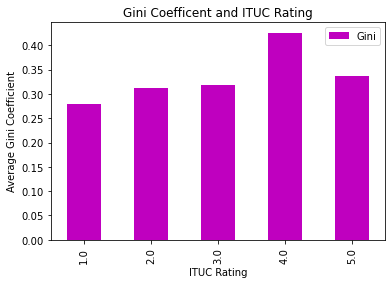

In [42]:
import matplotlib.colors as mcolors
#create bar plot for rating and Gini coefficient
df2.plot.bar("Score","Gini",color="m")
plt.title("Gini Coefficent and ITUC Rating")
plt.xlabel("ITUC Rating")
plt.ylabel("Average Gini Coefficient")
plt.savefig(os.path.join("Output","gvr.png"))

<AxesSubplot:xlabel='Gini', ylabel='Union %'>

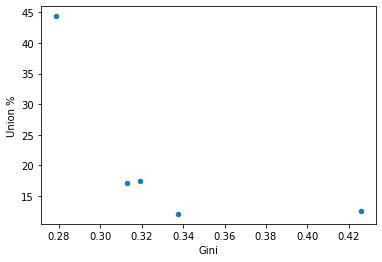

In [32]:
df2.plot.scatter("Gini","Union %")